In this notebook we will be building various classification machine learning models and comparing their results.

The dataset used in this exercise will be Credit Card Fraud Detection dataset from kaggle.
[Click here](https://www.kaggle.com/mlg-ulb/creditcardfraud) to download the dataset.

# Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')
dataset =  data.copy()
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

In [3]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#temporary variables X1,y1(pd dataframes) equivalent to X,y(np array) created for checking the table contents
X1 = dataset.copy() 
y1 = X1.pop("Class") 

In [5]:
X1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


Distribution of the Classes in the subsample dataset
0    0.998273
1    0.001727
Name: Class, dtype: float64


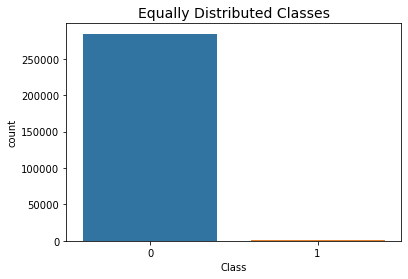

In [6]:
new_df = dataset.copy()
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

In [9]:
# this chunck will be used later 
name = ['Logistic Regression', 'K-Nearest Neighbour', 'Kernel SVM', 'Naive Bayes', 'Random Forest']
correct= []
wrong = []

# Analysis using Logistic Regression

In [10]:
# using Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
y_pred0 = logistic_classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm0 = confusion_matrix(y_test, y_pred0,  labels=[1,0])
#creating a more readable confusion matrix
confusion0 = pd.DataFrame(cm0, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion0)

           predicted fraud  predicted normal
is Fraud                79                41
is Normal               11             71071


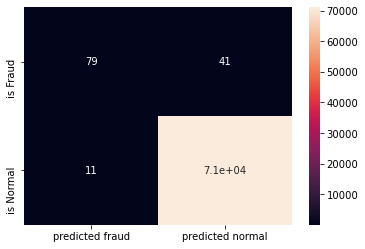

In [13]:
sns.heatmap(confusion0, annot=True)

In [14]:
correct.append( cm0[0][0]+cm0[1][1] ) 
wrong.append( cm0[0][1]+cm0[1][0] )

# Analysis using K-NN Classification

In [15]:
#using K-NN Classification
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
y_pred1 = KNN_classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1,  labels=[1,0])
#creating a more readable confusion matrix
confusion1 = pd.DataFrame(cm1, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion1)

           predicted fraud  predicted normal
is Fraud                96                24
is Normal                4             71078


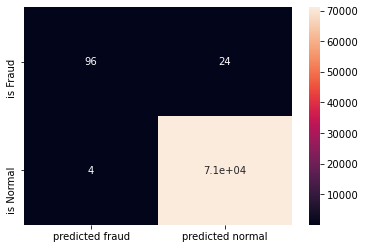

In [18]:
sns.heatmap(confusion1, annot=True)

In [19]:
correct.append( cm1[0][0]+cm1[1][1] ) 
wrong.append( cm1[0][1]+cm1[1][0] )

# Analysis using Kernel SVM

In [20]:
#using Kernel SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [21]:
y_pred2 = svm_classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2,  labels=[1,0])
#creating a more readable confusion matrix
confusion2 = pd.DataFrame(cm2, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion2)

           predicted fraud  predicted normal
is Fraud                77                43
is Normal                6             71076


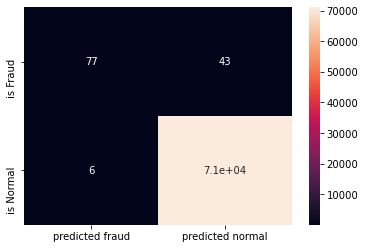

In [24]:
sns.heatmap(confusion2, annot=True)

In [25]:
correct.append( cm2[0][0]+cm2[1][1] ) 
wrong.append( cm2[0][1]+cm2[1][0] )

# Analysis using Naive Bayes

In [26]:
#using Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred3 = NB_classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3,  labels=[1,0])
#creating a more readable confusion matrix
confusion3 = pd.DataFrame(cm3, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion3)

           predicted fraud  predicted normal
is Fraud               100                20
is Normal             1516             69566


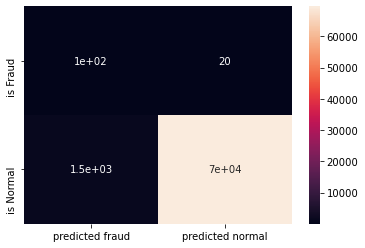

In [29]:
sns.heatmap(confusion3, annot=True)

In [30]:
correct.append( cm3[0][0]+cm3[1][1] ) 
wrong.append( cm3[0][1]+cm3[1][0] )

# Analysis using Random Forest

In [31]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
y_pred4 = RF_classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4,  labels=[1,0])
#creating a more readable confusion matrix
confusion4 = pd.DataFrame(cm4, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion4)

           predicted fraud  predicted normal
is Fraud                95                25
is Normal                7             71075


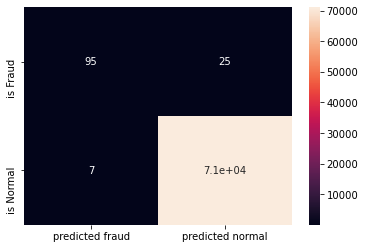

In [34]:
sns.heatmap(confusion4, annot=True)

In [35]:
correct.append( cm4[0][0]+cm4[1][1] ) 
wrong.append( cm4[0][1]+cm4[1][0] )

# Comparision (based upon test-data)

In [36]:
data = [name , correct , wrong]
result =pd.DataFrame(data)
result = result.transpose()
result.columns = ['Model Name','Accurate-Predictions','Wrong-Predictions']
result

,Model Name,Accurate-Predictions,Wrong-Predictions
0,Logistic Regression,71150,52
1,K-Nearest Neighbour,71174,28
2,Kernel SVM,71153,49
3,Naive Bayes,69666,1536
4,Random Forest,71170,32


We can observe that apart from Naive Bayes model, all other models have performed well and have given minimal wrong predictions about the test data.